https://quantpie.co.uk/bsm_formula/bs_summary.php

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Black Scholes for Vanilla](#p1)

# [2. Greeks for Vanilla Calls](#p2)

# [3. Greeks for Vanilla Puts](#p3)

# [4. Initial Parameters](#p4)

# [5. Black-Scholes Price Chart](#p5)

# [6. Vanilla Call Greeks Chart](#p6)

# [7. Vanilla Put Greeks Chart](#p7)

In [1]:
import scipy as sc
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
from scipy.optimize import brentq
import warnings 

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# <a id = "p1">1.</a>  <font color = "green"> Black Scholes Option Structure </font>  [back to table of contents](#top)

In [2]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [4]:
def Strangle(S, K_call, K_put, r, sigma, T):
    """
    Value of a strangle = long call + long put
    """
    call_price = BlackScholesCall(S, K_call, r, sigma, T)
    put_price = BlackScholesPut(S, K_put, r, sigma, T)
    return call_price + put_price

In [5]:
def RiskReversal(S, K_call, K_put, r, sigma, T):
    """
    Value of a risk reversal = long call - short put
    """
    call_price = BlackScholesCall(S, K_call, r, sigma, T)
    put_price = BlackScholesPut(S, K_put, r, sigma, T)
    return call_price - put_price

In [6]:
def CallButterfly(S, K1, K2, K3, r, sigma, T):
    """
    Value of a call butterfly spread: long K1, short 2*K2, long K3
    """
    C1 = BlackScholesCall(S, K1, r, sigma, T)
    C2 = BlackScholesCall(S, K2, r, sigma, T)
    C3 = BlackScholesCall(S, K3, r, sigma, T)
    return C1 - 2 * C2 + C3

In [7]:
def PutButterfly(S, K1, K2, K3, r, sigma, T):
    """
    Value of a put butterfly spread: long K1, short 2*K2, long K3
    """
    P1 = BlackScholesPut(S, K1, r, sigma, T)
    P2 = BlackScholesPut(S, K2, r, sigma, T)
    P3 = BlackScholesPut(S, K3, r, sigma, T)
    return P1 - 2 * P2 + P3

# <a id = "p2">2.</a>  <font color = "green"> Greeks for Risk Reversals </font>  [back to table of contents](#top)

In [8]:
def call_delta(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

In [9]:
def put_delta(S, K, r, sigma, T):
    return call_delta(S, K, r, sigma, T) - 1

In [10]:
def find_strike_for_delta(target_delta, S, r, sigma, T, option_type='call'):
    """
    Numerically solve for strike given target delta.
    """
    if option_type == 'call':
        f = lambda K: call_delta(S, K, r, sigma, T) - target_delta
    else:
        f = lambda K: put_delta(S, K, r, sigma, T) - target_delta
    
    return brentq(f, S * 0.5, S * 1.5)  # Assume realistic bounds

In [11]:
def risk_reversal_delta(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    delta_call = norm.cdf(d1_call)
    delta_put = norm.cdf(d1_put) - 1
    
    return delta_call - delta_put


In [12]:
def risk_reversal_gamma(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    gamma_call = norm.pdf(d1_call) / (S * sigma * np.sqrt(T))
    gamma_put = norm.pdf(d1_put) / (S * sigma * np.sqrt(T))
    
    return gamma_call - gamma_put

In [13]:
def risk_reversal_vega(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    vega_call = S * norm.pdf(d1_call) * np.sqrt(T)
    vega_put = S * norm.pdf(d1_put) * np.sqrt(T)
    
    return vega_call - vega_put

In [14]:
def risk_reversal_theta(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)

    theta_call = (-S * norm.pdf(d1_call) * sigma / (2 * np.sqrt(T)) -
                  r * K_call * np.exp(-r * T) * norm.cdf(d2_call))
    
    theta_put = (-S * norm.pdf(d1_put) * sigma / (2 * np.sqrt(T)) +
                 r * K_put * np.exp(-r * T) * norm.cdf(-d2_put))
    
    return theta_call - theta_put

In [15]:
def risk_reversal_rho(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    rho_call = K_call * T * np.exp(-r * T) * norm.cdf(d2_call)
    rho_put = -K_put * T * np.exp(-r * T) * norm.cdf(-d2_put)
    
    return rho_call - rho_put

In [16]:
def risk_reversal_vanna(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    vanna_call = - d2_call / sigma * norm.pdf(d1_call)
    vanna_put = - d2_put / sigma * norm.pdf(d1_put)
    
    return vanna_call - vanna_put

In [17]:
def risk_reversal_volga(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    vega_call = S * norm.pdf(d1_call) * np.sqrt(T)
    vega_put = S * norm.pdf(d1_put) * np.sqrt(T)
    volga_call = vega_call * d1_call * d2_call / sigma
    volga_put = vega_put * d1_put * d2_put / sigma
    
    return volga_call - volga_put

In [18]:
def risk_reversal_color(S, K_call, K_put, r, sigma, T):
    
    d1_call = (np.log(S/K_call)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_call = d1_call - sigma*np.sqrt(T)
    
    d1_put = (np.log(S/K_put)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_put = d1_put - sigma*np.sqrt(T)
    
    color_call = -norm.pdf(d1_call) / (2 * S * T * sigma * np.sqrt(T)) * (1 + d1_call / (sigma * np.sqrt(T)))
    color_put = -norm.pdf(d1_put) / (2 * S * T * sigma * np.sqrt(T)) * (1 + d1_put / (sigma * np.sqrt(T)))
    
    return color_call - color_put

# <a id = "p3">3.</a>  <font color = "green"> Greeks for Butterfly </font>  [back to table of contents](#top)

In [19]:
def d1_d2(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

In [20]:
def butterfly_delta(S, K1, K2, K3, r, sigma, T, option_type='call'):
    def delta(S, K):
        d1, _ = d1_d2(S, K, r, sigma, T)
        return norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    return delta(S, K1) - 2 * delta(S, K2) + delta(S, K3)

In [21]:
def butterfly_gamma(S, K1, K2, K3, r, sigma, T):
    def gamma(S, K):
        d1, _ = d1_d2(S, K, r, sigma, T)
        return norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma(S, K1) - 2 * gamma(S, K2) + gamma(S, K3)

In [22]:
def butterfly_vega(S, K1, K2, K3, r, sigma, T):
    def vega(S, K):
        d1, _ = d1_d2(S, K, r, sigma, T)
        return S * norm.pdf(d1) * np.sqrt(T)
    return vega(S, K1) - 2 * vega(S, K2) + vega(S, K3)

In [23]:
def butterfly_theta(S, K1, K2, K3, r, sigma, T, option_type='call'):
    def theta(S, K):
        d1, d2 = d1_d2(S, K, r, sigma, T)
        term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
        if option_type == 'call':
            term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
        else:
            term2 = r * K * np.exp(-r * T) * norm.cdf(-d2)
        return term1 + term2
    return theta(S, K1) - 2 * theta(S, K2) + theta(S, K3)

In [24]:
def butterfly_rho(S, K1, K2, K3, r, sigma, T, option_type='call'):
    def rho(S, K):
        _, d2 = d1_d2(S, K, r, sigma, T)
        if option_type == 'call':
            return K * T * np.exp(-r * T) * norm.cdf(d2)
        else:
            return -K * T * np.exp(-r * T) * norm.cdf(-d2)
    return rho(S, K1) - 2 * rho(S, K2) + rho(S, K3)

In [25]:
def butterfly_vanna(S, K1, K2, K3, r, sigma, T):
    def vanna(S, K):
        d1, d2 = d1_d2(S, K, r, sigma, T)
        return - d2 / sigma * norm.pdf(d1)
    return vanna(S, K1) - 2 * vanna(S, K2) + vanna(S, K3)

In [26]:
def butterfly_volga(S, K1, K2, K3, r, sigma, T):
    def volga(S, K):
        d1, d2 = d1_d2(S, K, r, sigma, T)
        vega = S * norm.pdf(d1) * np.sqrt(T)
        return vega * d1 * d2 / sigma
    return volga(S, K1) - 2 * volga(S, K2) + volga(S, K3)

In [27]:
def butterfly_color(S, K1, K2, K3, r, sigma, T):
    def color(S, K):
        d1, _ = d1_d2(S, K, r, sigma, T)
        return -norm.pdf(d1) / (2 * S * T * sigma * np.sqrt(T)) * (1 + d1 / (sigma * np.sqrt(T)))
    return color(S, K1) - 2 * color(S, K2) + color(S, K3)

# <a id = "p4">4.</a>  <font color = "green"> Initial Parameters </font>  [back to table of contents](#top)

In [28]:
S = np.arange(0, 200, 1)     # Underlying asset price

K_call=110                   # Option strike price
K_put=90                     # Option strike price

K1=90
K2=100
K3=110

r=0.05                       # Risk-free interest rate
sigma=0.2                    # Volatility of the underlying asset
T=1                          # Time to expiration in years

# <a id = "p5">5.</a>  <font color = "green"> Risk Reversal Price Chart </font>  [back to table of contents](#top)

In [29]:
def BlackScholesRRPricing(model):

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    prices = [model(S, K_call, K_put, r, sigma, T) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Value")

    # Slider definitions

    rf_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)
    
    strike_call_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_call_slider = Slider(strike_call_slider_ax, 'Strike_Call', 50, 150, valinit=K_call)
    
    strike_put_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    strike_put_slider = Slider(strike_put_slider_ax, 'Strike_Put', 50, 150, valinit=K_put)
    
    time_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        sigma_current = sigma_slider.val
        strike_call_current = strike_call_slider.val
        strike_put_current = strike_put_slider.val
        T_current = time_slider.val

        prices = [model(S, strike_call_current, strike_put_current, rf_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    rf_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_call_slider.on_changed(sliders_on_changed)
    strike_put_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        sigma_slider.reset()
        strike_call_slider.reset()
        strike_put_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

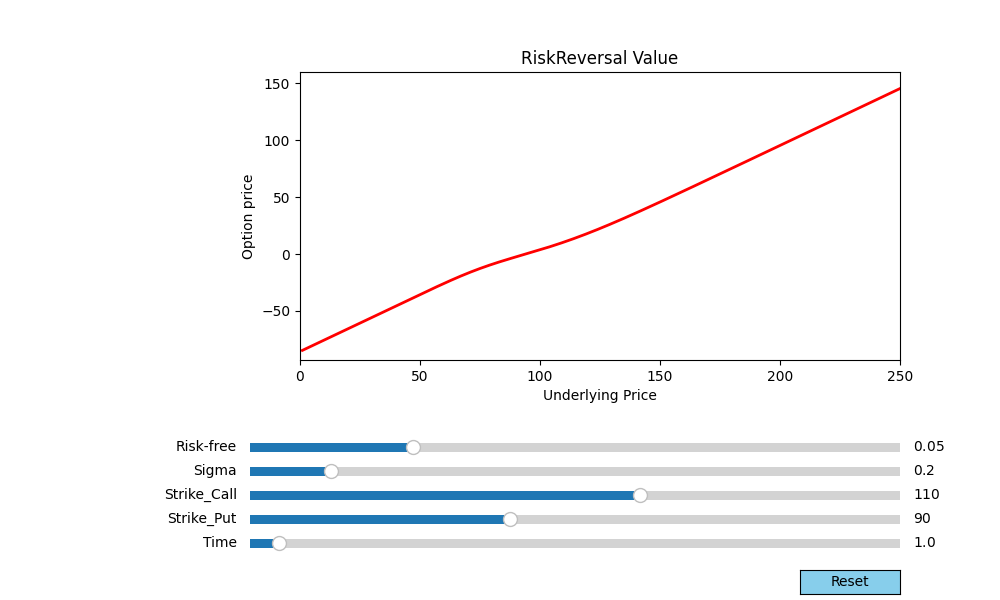

In [30]:
BlackScholesRRPricing(RiskReversal)

# <a id = "p6">6.</a>  <font color = "green"> Butterfly Price Chart </font>  [back to table of contents](#top)

In [31]:
def BlackScholesBFPricing(model):

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    prices = [model(S, K1, K2, K3, r, sigma, T) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Value")

    # Slider definitions

    rf_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)
    
    strike_K1_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_K1_slider = Slider(strike_K1_slider_ax, 'K1', 50, 150, valinit=K1)
    
    strike_K2_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    strike_K2_slider = Slider(strike_K2_slider_ax, 'K2', 50, 150, valinit=K2)
    
    strike_K3_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.03], facecolor=axis_color)
    strike_K3_slider = Slider(strike_K3_slider_ax, 'K2', 50, 150, valinit=K3)
    
    time_slider_ax = fig.add_axes([0.25, 0.04, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        sigma_current = sigma_slider.val
        strike_K1_current = strike_K1_slider.val
        strike_K2_current = strike_K2_slider.val
        strike_K3_current = strike_K3_slider.val
        T_current = time_slider.val

        prices = [model(S, strike_K1_current, strike_K2_current, strike_K3_current, rf_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    rf_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_K1_slider.on_changed(sliders_on_changed)
    strike_K2_slider.on_changed(sliders_on_changed)
    strike_K3_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        sigma_slider.reset()
        strike_K1_slider.reset()
        strike_K2_slider.reset()
        strike_K3_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

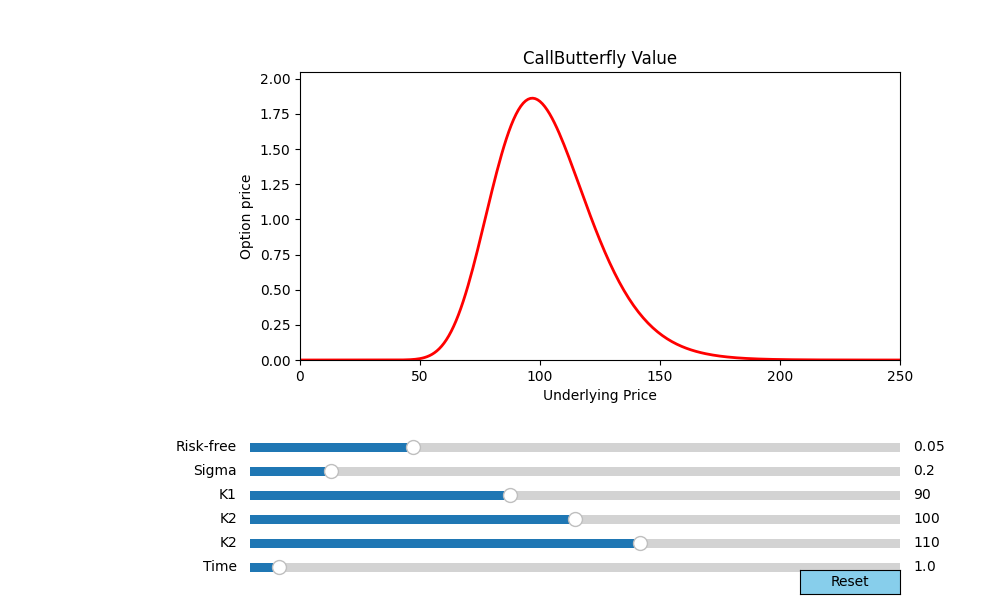

In [32]:
BlackScholesBFPricing(CallButterfly)

# <a id = "p7">7.</a>  <font color = "green"> Risk Reversal Greeks </font>  [back to table of contents](#top)

In [33]:
def BlackScholesRRGreeks(model,greek):

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    greeks = [greek(S, K_call, K_put, r, sigma, T) for S in S_range]

    line, = ax.plot(S_range, greeks, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel(f"{greek.__name__}")
    ax.set_title(f"Change in {greek.__name__} for {model.__name__}")

    # Slider definitions

    rf_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)
    
    strike_call_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_call_slider = Slider(strike_call_slider_ax, 'Strike_Call', 50, 150, valinit=K_call)
    
    strike_put_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    strike_put_slider = Slider(strike_put_slider_ax, 'Strike_Put', 50, 150, valinit=K_put)
    
    time_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        sigma_current = sigma_slider.val
        strike_call_current = strike_call_slider.val
        strike_put_current = strike_put_slider.val
        T_current = time_slider.val

        greeks = [greek(S, strike_call_current, strike_put_current, rf_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(greeks)
        ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    rf_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_call_slider.on_changed(sliders_on_changed)
    strike_put_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        sigma_slider.reset()
        strike_call_slider.reset()
        strike_put_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

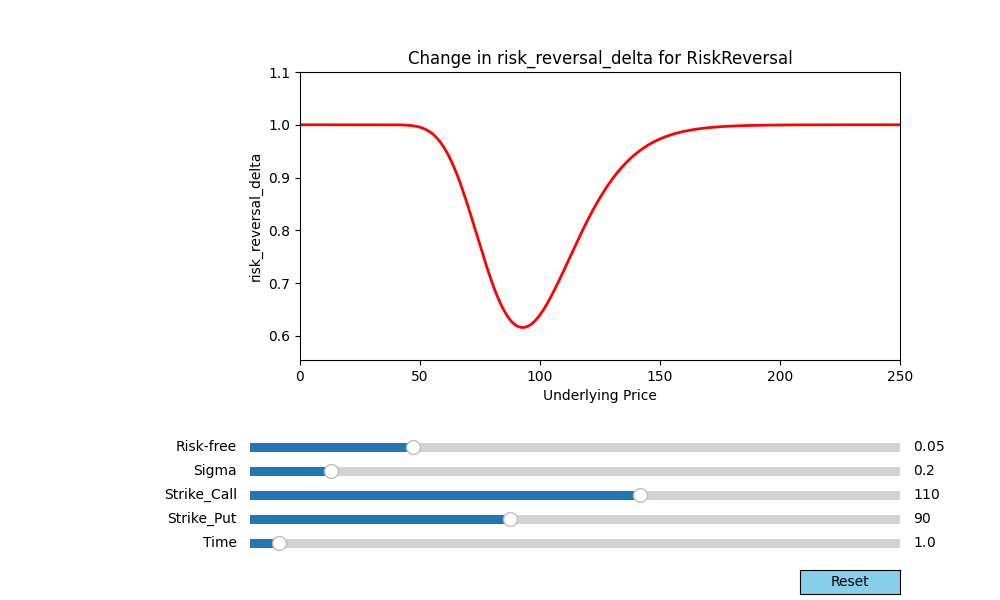

In [34]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_delta)

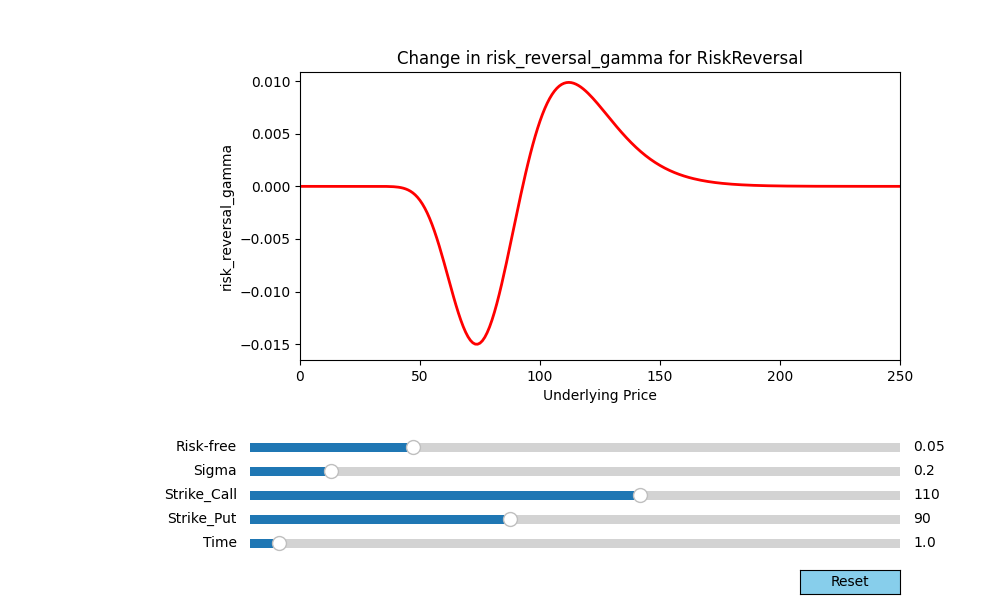

In [35]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_gamma)

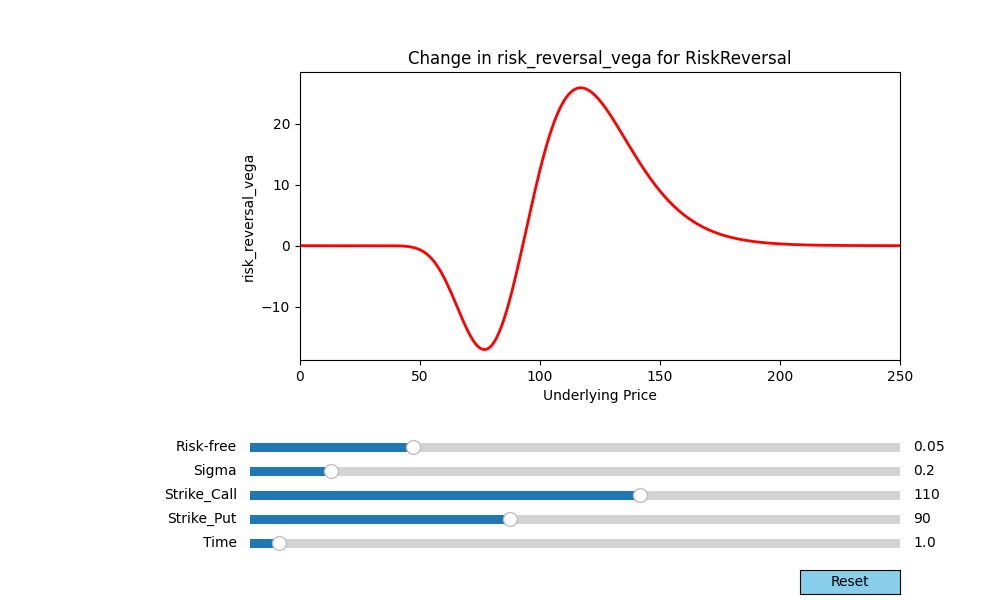

In [36]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_vega)

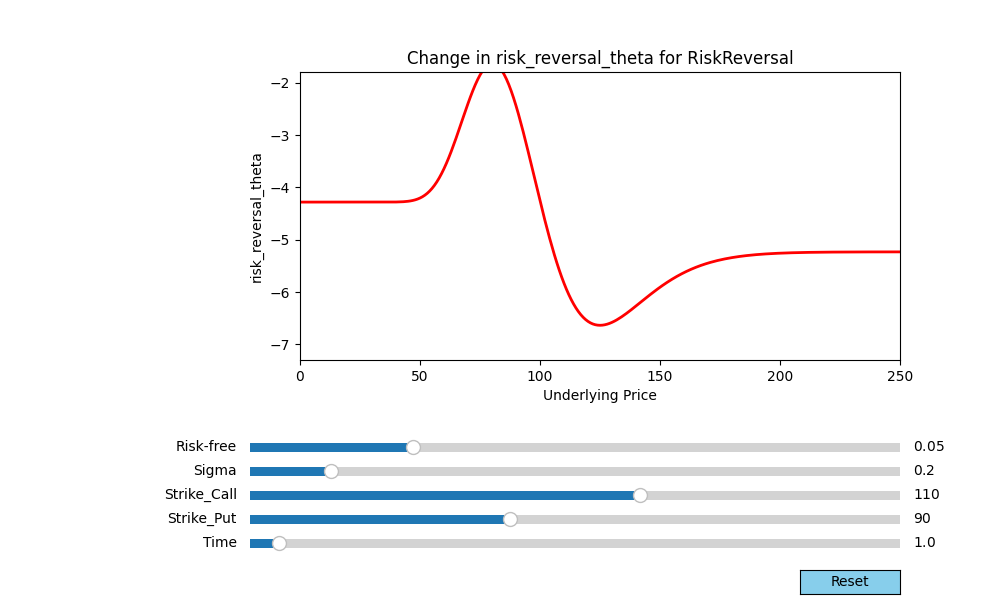

In [37]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_theta)

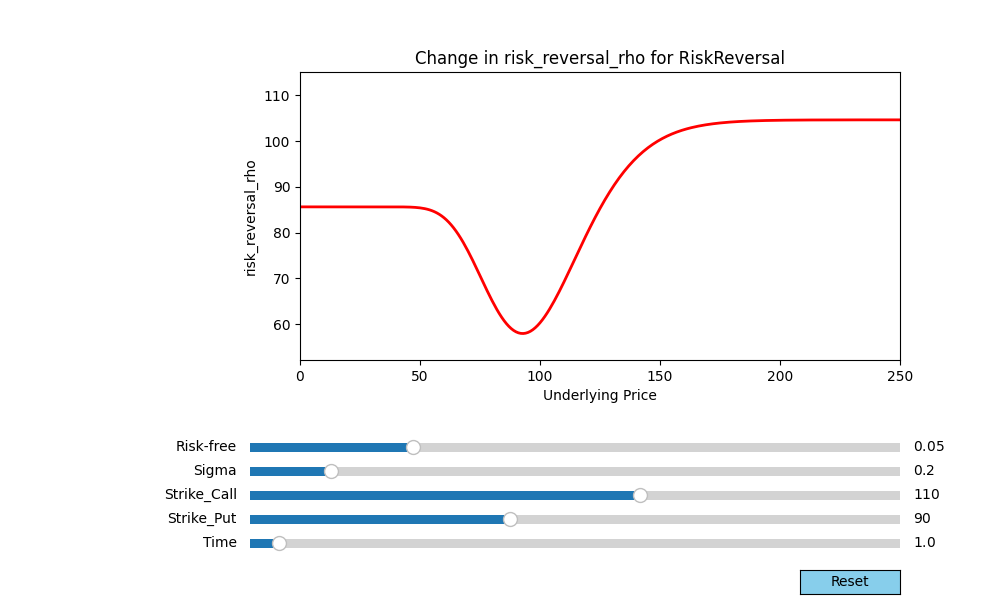

In [38]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_rho)

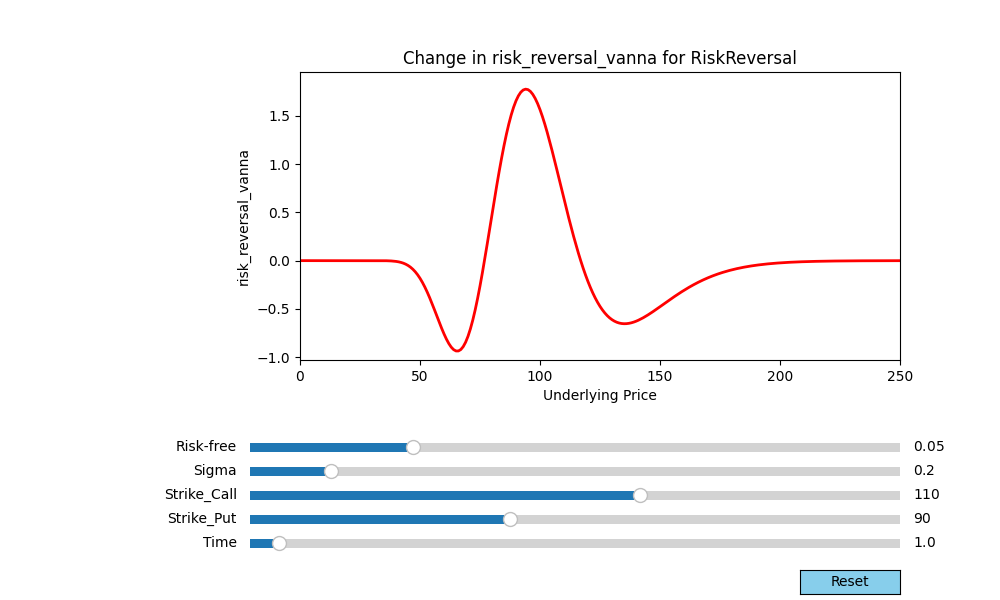

In [51]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_vanna)

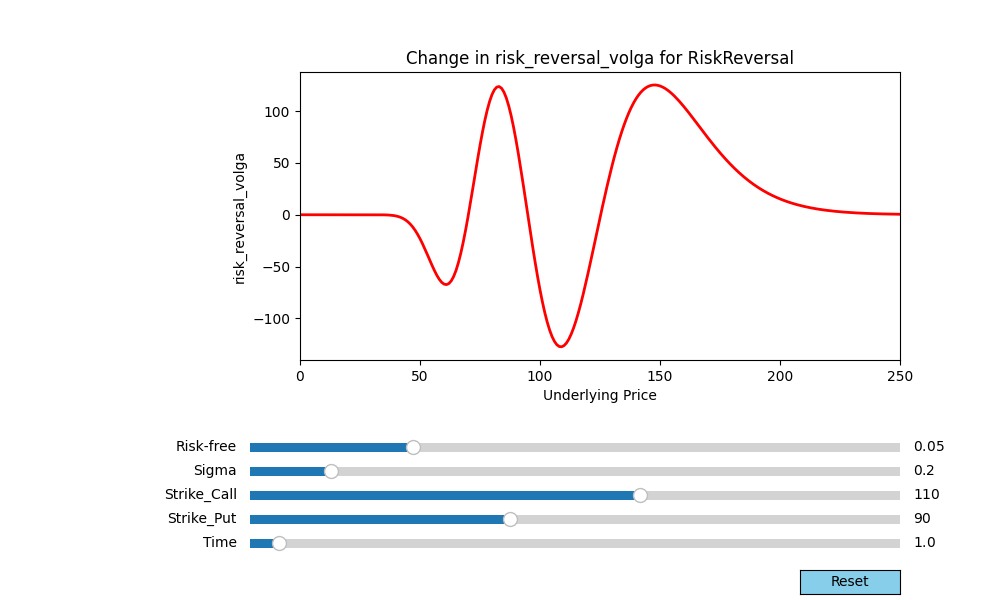

In [52]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_volga)

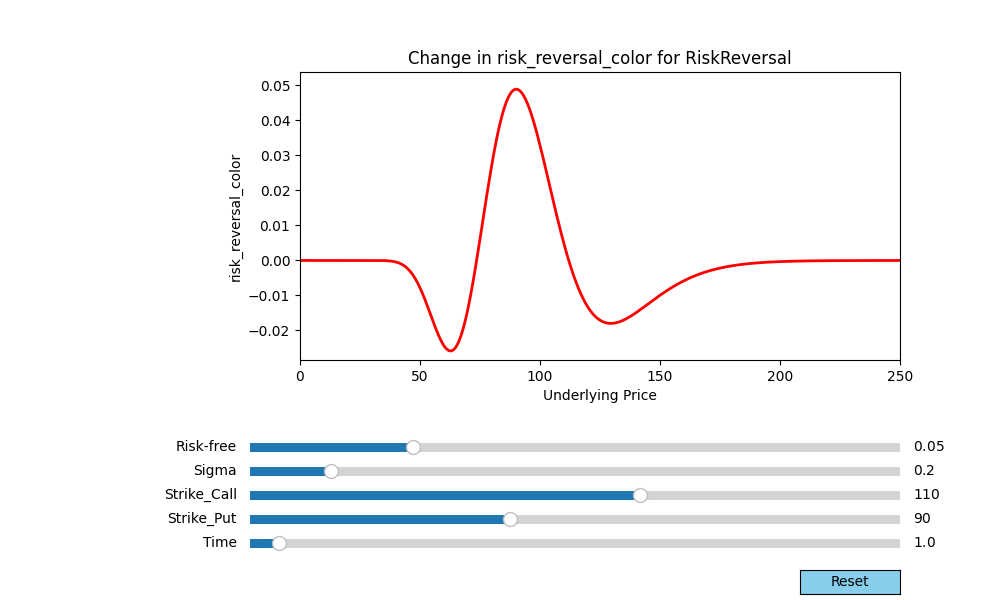

In [41]:
BlackScholesRRGreeks(model=RiskReversal,greek=risk_reversal_color)

# <a id = "p8">8.</a>  <font color = "green"> Butterfly Greeks </font>  [back to table of contents](#top)

In [42]:
def BlackScholesBFGreeks(model,greek):

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    greeks = [greek(S, K1, K2, K3, r, sigma, T) for S in S_range]

    line, = ax.plot(S_range, greeks, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel(f"{greek.__name__}")
    ax.set_title(f"Change in {greek.__name__} for {model.__name__}")

    # Slider definitions

    rf_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)
    
    strike_K1_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_K1_slider = Slider(strike_K1_slider_ax, 'K1', 50, 150, valinit=K1)
    
    strike_K2_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    strike_K2_slider = Slider(strike_K2_slider_ax, 'K2', 50, 150, valinit=K2)
    
    strike_K3_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.03], facecolor=axis_color)
    strike_K3_slider = Slider(strike_K3_slider_ax, 'K2', 50, 150, valinit=K3)
    
    time_slider_ax = fig.add_axes([0.25, 0.04, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        sigma_current = sigma_slider.val
        strike_K1_current = strike_K1_slider.val
        strike_K2_current = strike_K2_slider.val
        strike_K3_current = strike_K3_slider.val
        T_current = time_slider.val

        greeks = [greek(S, strike_K1_current, strike_K2_current, strike_K3_current, rf_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(greeks)
        ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    rf_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_K1_slider.on_changed(sliders_on_changed)
    strike_K2_slider.on_changed(sliders_on_changed)
    strike_K3_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        sigma_slider.reset()
        strike_K1_slider.reset()
        strike_K2_slider.reset()
        strike_K3_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

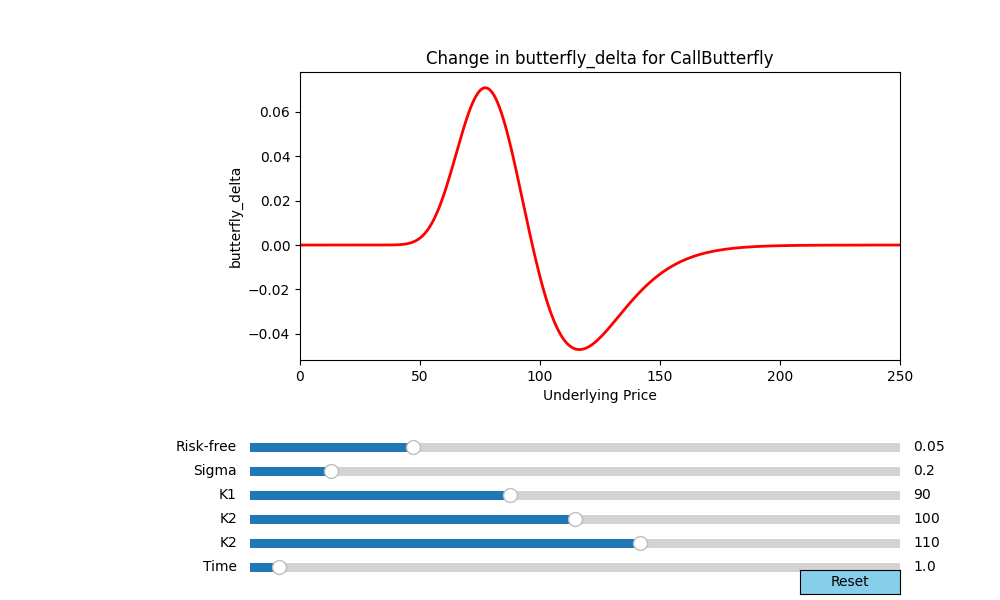

In [43]:
BlackScholesBFGreeks(CallButterfly,butterfly_delta)

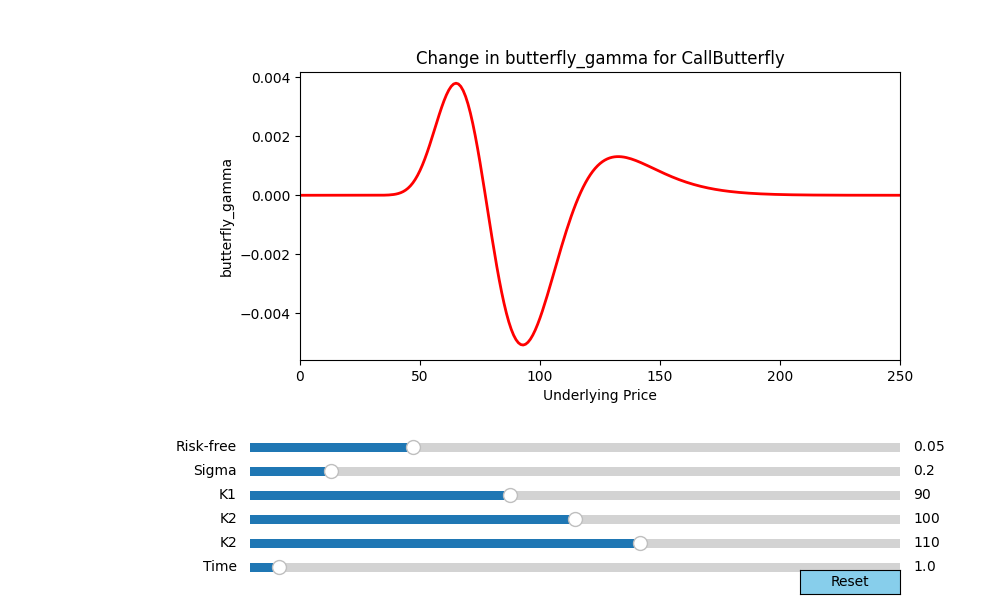

In [44]:
BlackScholesBFGreeks(CallButterfly,butterfly_gamma)

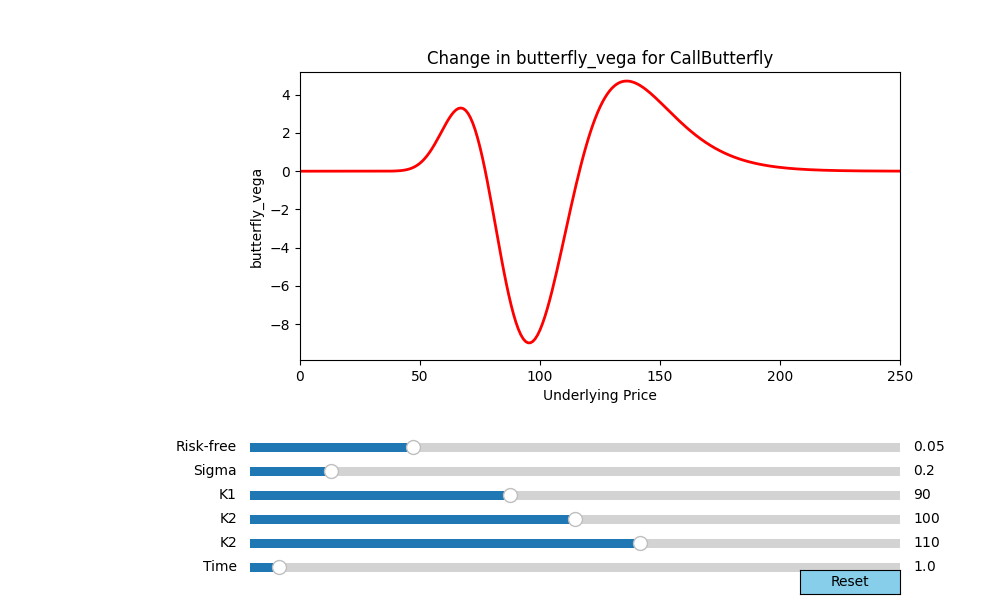

In [45]:
BlackScholesBFGreeks(CallButterfly,butterfly_vega)

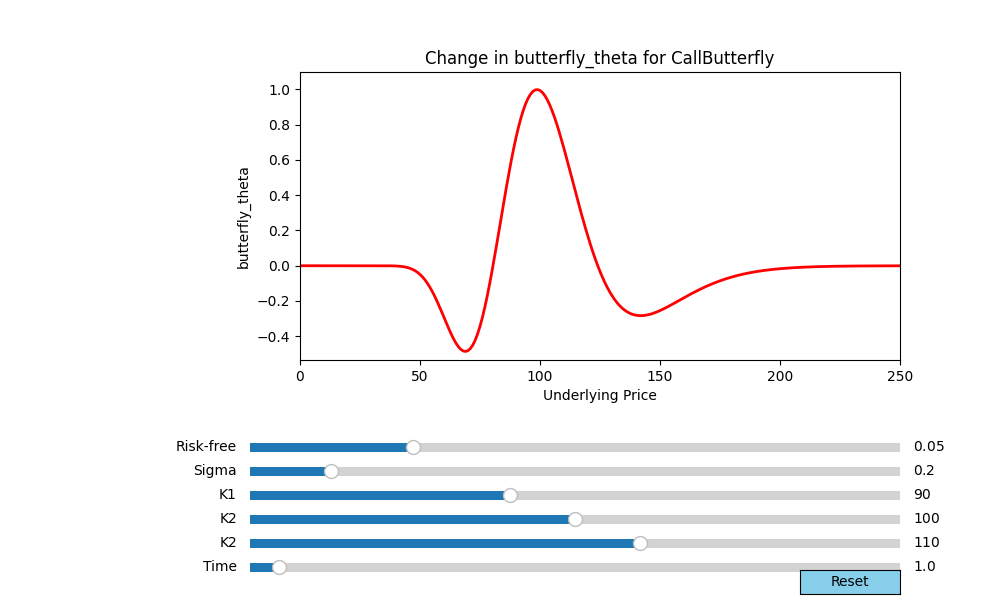

In [46]:
BlackScholesBFGreeks(CallButterfly,butterfly_theta)

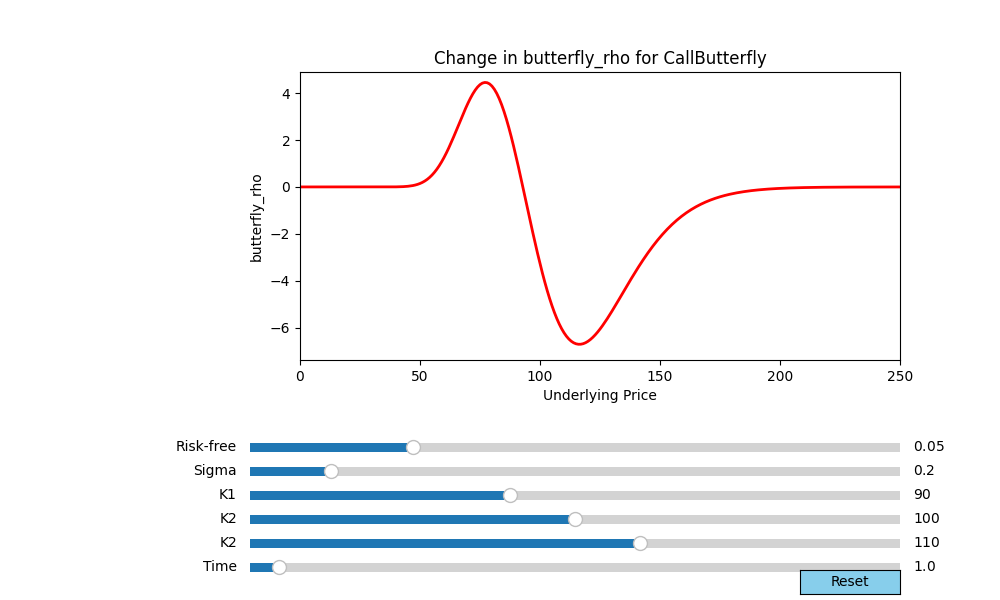

In [47]:
BlackScholesBFGreeks(CallButterfly,butterfly_rho)

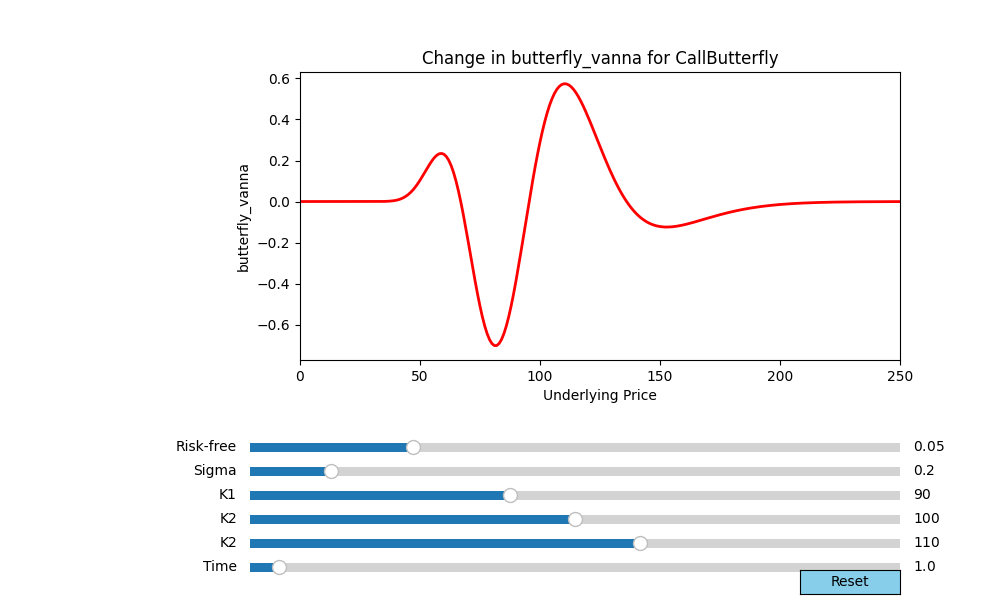

In [53]:
BlackScholesBFGreeks(CallButterfly,butterfly_vanna)

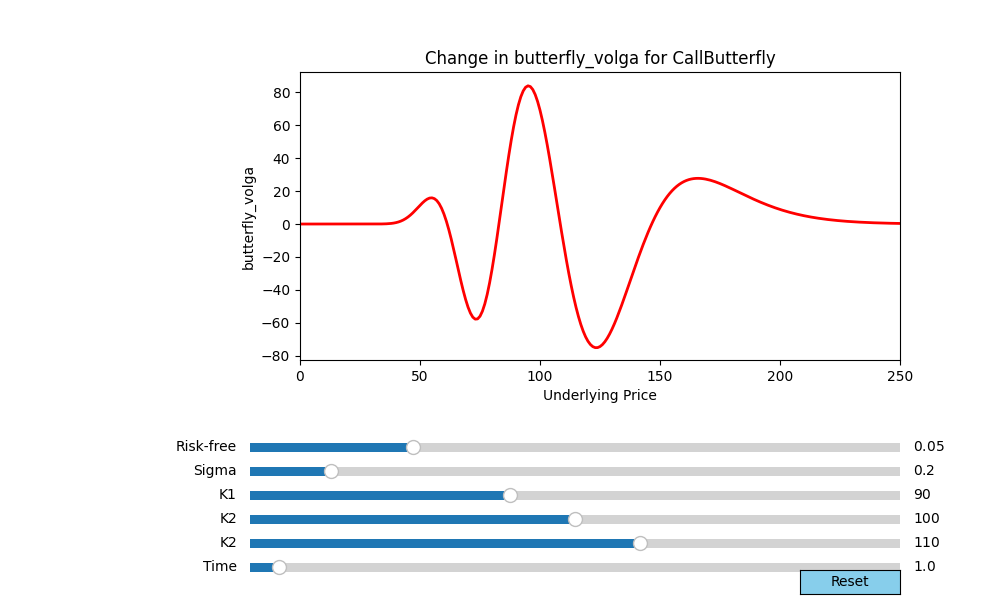

In [54]:
BlackScholesBFGreeks(CallButterfly,butterfly_volga)

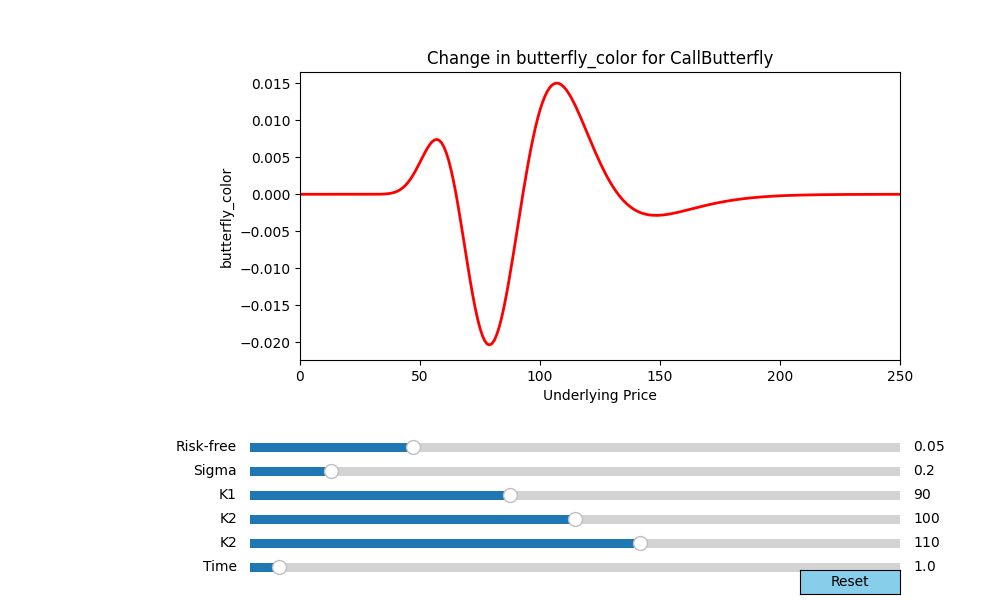

In [55]:
BlackScholesBFGreeks(CallButterfly,butterfly_color)